## Importing flat files from the web: your turn!
You are about to import your first file from the web! The flat file you will import will be `winequality-red.csv` from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [2]:
# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, '../data/13. Importando datos en Python/winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('../data/13. Importando datos en Python/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

In [3]:
# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame and print its head
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\vilieri.i\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\vilieri.i\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


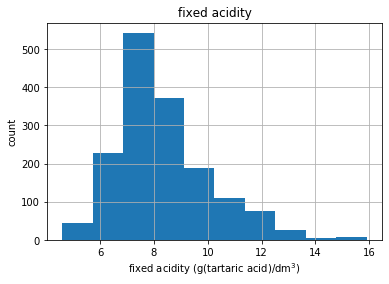

In [4]:
# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

## Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

In [5]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
xl['1700'].head()

odict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


Note that the output of pd.read_excel() is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

## Performing HTTP requests in Python using urllib
Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information 

In [3]:
from urllib.request import urlopen, Request

In [5]:
# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


## Printing HTTP request results in Python using urllib
You have just packaged and sent a GET request and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse`object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [6]:
# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!DOCTYPE html>\r\n<html lang="es-ar">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <title>D&#243;lar hoy, Cotizaci&#243;n del d&#243;lar, precio del dolar | Dolarhoy.com</title>\r\n    <meta name="description" content="Segu&#237; la cotizaci&#243;n del dolar minuto a minuto, conoc&#233; el precio del dolar en Dolarhoy.com" />\r\n    <meta name="keywords" content="" />\r\n    <meta name="author" content="DolarHoy">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\r\n    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-alpha.6/css/bootstrap.min.css" integrity="sha384-rwoIResjU2yc3z8GV/NPeZWAv56rSmLldC3R/AZzGRnGxQQKnKkoFVhFQhNUwEyJ" crossorigin="anonymous">\r\n    <link rel="stylesheet" href="/Content/Site.css?v=1" />\r\n    <link rel="icon" href="/Content/img/favicon.png">\r\n    <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700" rel="stylesheet">\r\n    <link href="htt

## Performing HTTP requests in Python using requests
Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [7]:
import requests

In [8]:
# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="y+PoXygxjebQ7yqYMhz2n64w07r0z1zPnOJY25ZPJH8="></script>
      <script nonce="y+PoXygxjebQ7yqYMhz2n64w07r0z1zPnOJY25ZPJH8=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

## Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. 

You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. 

In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

In [9]:
from bs4 import BeautifulSoup

In [10]:
# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publicati

## Turning a webpage into data using BeautifulSoup: getting the text
As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [12]:
# Specify url: url
url = 'https://www.dolarhoy.com/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)


<title>Dólar hoy, Cotización del dólar, precio del dolar | Dolarhoy.com</title>


In [13]:
# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)




Dólar hoy, Cotización del dólar, precio del dolar | Dolarhoy.com













        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());

        gtag('config', 'UA-17836200-19');
    


        var OneSignal = window.OneSignal || [];
        OneSignal.push(function () {
            OneSignal.init({
                appId: "9a12b35f-e6f8-4094-af9d-50102f7b9d8f",
            });
        });
    


        !function(f,b,e,v,n,t,s)
        {if(f.fbq)return;n=f.fbq=function(){n.callMethod?
                n.callMethod.apply(n,arguments):n.queue.push(arguments)};
            if(!f._fbq)f._fbq=n;n.push=n;n.loaded=!0;n.version='2.0';
            n.queue=[];t=b.createElement(e);t.async=!0;
            t.src=v;s=b.getElementsByTagName(e)[0];
            s.parentNode.insertBefore(t,s)}(window, document,'script',
            'https://connect.facebook.net/en_US/fbevents.js');
        fbq('init', '659667634132634');
  

## Turning a webpage into data using BeautifulSoup: getting the hyperlinks
In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

Use the method `find_all()` to find all hyperlinks in soup, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable a_tags

In [16]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

/
#
/cotizacion-dolar-oficial
/cotizacion-dolar-blue
/cotizacion-dolar-bolsa
/cotizacion-dolar-mep
/cotizacion-dolar-ccl
/cotizacion-dolar-turista
/cotizacion-dolar-bull-exchange
/cotizacion-euro
/cotizacion-oro
#
/cotizacion-peso-uruguayo
/cotizacion-peso-chileno
/cotizacion-real-brasileno
/cotizaciondolaroficial
/cotizaciondolarblue
/cotizaciondolarbolsa
/cotizaciondolarcontadoconliqui
https://www.youtube.com/channel/UCC1T5E1SKjKz7apQ8IkxTGQ
https://instagram.com/ramiromarra/
/cotizaciondolarturista
https://www.youtube.com/watch?v=SMuO1x7Tm8k
http://ramiromarra.com.ar
https://bullmarketbrokers.com
http://bullexchange.com.ar
#carouselExampleControls1
#carouselExampleControls1
http://ramiromarra.com.ar
https://bullmarketbrokers.com
http://bullexchange.com.ar
#carouselExampleControls2
#carouselExampleControls2
/cotizacion-dolar-banco-nacion
/cotizacion-dolar-blue
/cotizacion-dolar-mayorista
/cotizacion-dolar-bolsa
/cotizacion-dolar-contado-con-liquidacion
/cotizacion-euro
/cotizacion-re

# What's an API?

An API is a set of protocols and routines for building and interacting with software applications

## API requests
Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that to query the API about the movie Hackers the query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument `t=hackers`.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: `apikey=72bc447a`.

In [16]:
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 171 wins & 183 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"608,571","imdbID":"tt1285

## What exactly is a JSON?

JSONs consist of key-value pairs.

Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. 

It will be a dictionary.

## JSON–from the web to Python
Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

In [17]:
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 171 wins & 183 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  608,571
imdbID:  tt1285016
Type:  movie
DVD:  11

## Checking out the Wikipedia API
You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

In [18]:
# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 1

# API Authentication
The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App). Your task is to pass these credentials to tweepy's OAuth handler.

In [17]:
try:
    import tweepy
except ModuleNotFoundError:
    !pip install tweepy
    import tweepy

Go to https://apps.twitter.com to create a new application, each application has its own keys

In [18]:
# Store OAuth authentication credentials in relevant variables
access_token = "1952916806-9WbU9ROPLd4aVPprQZqWJhaW4RSXrBw4oK8A4Ow"
access_token_secret = "gW5iuYPtrTxVhPmQxBemsKz6jCAOqbYx1fT0ewKHFyAkG"
consumer_key = "46pvnSwIVylfWepbPsP4433wL"
consumer_secret = "xWDPHaUkk0ub93qj1DaYgJcO8QtkPUhNFIE7uBAvzbSVLLpLzR"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

## Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener. You can find the code for the tweet stream listener class here.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

In [19]:
import  re

# get tweets from a given user
def get_tweets(user, limit=10):
    results = api.user_timeline(screen_name=user , count=limit , tweet_mode='extended' )
    tweets = [] # tweet list initially empty
    for r in results :
        # uses regular expression to remove the tweet's URL
        # http takes the start of the url
        # \ S + takes non-white characters (the end of the URL) 
        tweet = re.sub( r'http\S+', '' , r.full_text )
        tweets.append(tweet.replace('\n', '')) # add to list
    return tweets  # returns the list of tweets

In [20]:
# create an api object
api  =  tweepy.API(auth)

# write tweets to a file 'tweets.txt'
tweets = get_tweets(user = 'jairbolsonaro', limit=5)
for t in tweets:
    print(t, '\n')

- Cerca de 500kg de pasta base e cloridrato de cocaína em Santo Antônio do Leverger/MT. - Foram apreendidos 184kg de cloridrato e 279kg de pasta base de cocaína. Um prejuízo ao narcotráfico estimado em mais de R$62,5 MILHÕES de reais.- @PRFBrasil @JusticaGovBR  

- Devem, por isso, se manter apartidárias, “baseadas na hierarquia e na disciplina, sob a autoridade suprema do Presidente da República”. 

- São elas o maior sustentáculo e garantidores da Democracia e da Liberdade e destinam-se, como reza a Constituição, “à defesa da Pátria, à garantia dos poderes constitucionais e, por iniciativa de quaisquer destes, da lei e da ordem”. 

- A afirmação do General Edson Leal Pujol (escolhido por mim para Comandante do Exército), que “militares não querem fazer parte da política”, vem exatamente ao encontro do que penso sobre o papel das Forças Armadas no cenário nacional. 

- O governador de São Paulo promoveu brutal aumento do ICMS.- Impactará no preço final dos ALIMENTOS, veículos, vestuár

In [21]:
tweets = get_tweets(user = 'POTUS', limit=5)
for t in tweets:
    print(t, '\n')

RT @realDonaldTrump: ....We cannot waste time and can only give to those states that will use the Vaccine immediately. Therefore the New Yo… 

RT @realDonaldTrump: I LOVE NEW YORK! As everyone knows, the Trump Administration has produced a great and safe VACCINE far ahead of schedu… 

RT @realDonaldTrump:  

RT @realDonaldTrump: Congress must now do a Covid Relief Bill. Needs Democrats support. Make it big and focused. Get it done! 

RT @WhiteHouse: .@VP @Mike_Pence: "Before the year is out, we'll be able to administer a vaccine to tens of millions of Americans."  



In [22]:
df = pd.DataFrame(tweets, columns=['tweet'])
df.head()

,tweet
0,RT @realDonaldTrump: ....We cannot waste time ...
1,RT @realDonaldTrump: I LOVE NEW YORK! As every...
2,RT @realDonaldTrump:
3,RT @realDonaldTrump: Congress must now do a Co...
4,"RT @WhiteHouse: .@VP @Mike_Pence: ""Before the ..."
